In [1]:
import pandas as pd

In [2]:
read_path = '../article/headline_keyword/'

keyword_all = pd.read_csv(f'{read_path}week0_headline_keyword.csv')
keyword_all['week'] = 0

for i in range(1,783):
    df = pd.read_csv(f'{read_path}week{i}_headline_keyword.csv')
    df['week'] = i
    keyword_all = pd.concat([keyword_all,df],ignore_index = True)

In [3]:
keyword_all

,Unnamed: 0,date,headline,keyword,week
0,0,2006.01.01. 오후 11:23,취득세ㆍ등록세 0.5%P씩 인하,"[('취득세', 'CIVILIZATION'), ('ㆍ', 'O'), ('등록세', ...",0
1,1,2006.01.01. 오후 11:23,양도세 부담 덜자 하반기 매물 늘듯,"[('양도세', 'CIVILIZATION'), (' ', 'O'), ('부담', '...",0
2,2,2006.01.01. 오후 11:23,서울 대치동 57평형 보유세 651만원,"[('서울', 'CITY'), (' ', 'O'), ('대치동', 'LOCATION...",0
3,3,2006.01.01. 오후 11:23,양도세 줄이는 방법 필요경비 증빙서류 꼭 챙기자,"[('양도세', 'CIVILIZATION'), (' ', 'O'), ('줄이는', ...",0
4,4,2006.01.01. 오후 11:23,올해 실거래가 신고제 폭풍 이중계약서 관행 사라진다,"[('올해', 'DATE'), (' ', 'O'), ('실거래가', 'CIVILIZ...",0
...,...,...,...,...,...
1012957,1486,2020.12.31. 오전 3:05,부동산 100자 정보 대보건설 올해 1조105억원 수주 성공 외,"[('부동산', 'O'), (' ', 'O'), ('100자', 'QUANTITY'...",782
1012958,1487,2020.12.31. 오전 3:05,미분양 주택도 패닉바잉 17년만에 최저치,"[('미분양', 'O'), (' ', 'O'), ('주택도', 'O'), (' ',...",782
1012959,1488,2020.12.31. 오전 3:03,집값 조사때 표본수 늘리고 실거래감정가 추가,"[('집값', 'O'), (' ', 'O'), ('조사때', 'O'), (' ', ...",782
1012960,1489,2020.12.31. 오전 12:32,치솟는 집값에 미분양 아파트 3년만에 최저,"[('치솟는', 'O'), (' ', 'O'), ('집값에', 'O'), (' ',...",782


In [4]:
gu_name = ['강남구','강동구','강서구','강북구','관악구','광진구','구로구','금천구',
          '노원구','동대문구','도봉구','동작구','마포구','서대문구','성동구','성북구',
          '서초구','송파구','영등포구','용산구','양천구','은평구','종로구','중구','중랑구']

many = len(gu_name)

In [5]:
# 구 별로 dataframe 불러오기
def get_dataframe(name):
    return pd.read_csv(f'../seoul_apt_trade_data/monthly_trade/{name}_trade.csv', encoding = 'cp949')

# 주 단위로 data저장
def save_dataframe(df, name, week):
    df.to_csv(f'../seoul_apt_trade_data/weekly_trade/{name}_{week}week_trade.csv', encoding = 'cp949')

In [6]:
import pandas as pd
import datetime

gu_data = [get_dataframe(name) for name in gu_name]
price_data = []

start_date = datetime.date(2006,1,1)
#weeks = int(datetime.date(2021,1,31) - start_date)//7
for i in range(many):
    gu_data[i]['면적당가격'] = gu_data[i]['거래금액']/gu_data[i]['전용면적']
    gu_data[i]['거래주'] = [(datetime.date((int)(date[:4]),(int)(date[5:7]),(int)(date[8:10]))-start_date).days//7 for date in gu_data[i]['거래일']]
    gu_data[i]['count'] = 1
    price_data.append(gu_data[i].loc[:,['거래주','면적당가격','count']].groupby('거래주').sum())
    price_data[i]['면적당가격'] = price_data[i]['면적당가격']/price_data[i]['count']

In [7]:
#save trade data weekly
for i in range(many):
    for week in range(788):
        df = gu_data[i][gu_data[i]['거래주'] == week]
        save_dataframe(df, gu_name[i], week)

In [8]:
price_data[3].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            777, 778, 779, 780, 781, 782, 783, 784, 785, 786],
           dtype='int64', name='거래주', length=785)

In [9]:
for i in range(many):    
    for w in range(788):
        idx = price_data[i].index
        if w not in idx:
            price_data[i].loc[w] = [price_data[i]['면적당가격'][w-1],0]

In [11]:
(price_data[0]['면적당가격'][781] - price_data[0]['면적당가격'][0])/ price_data[0]['면적당가격'][0]

1.1957149047027027

In [ ]:
(1+x)^781 = 1.1957149047027027
(1+0.00022889207)^781 = 1.19571490203
x = 0.00022889207

In [12]:
_avg2 = 0.00022889207

In [15]:
rate_variation = []

for i in range(many):
    variation = []
    for w in range(1,786):
        variation.append((price_data[i]['면적당가격'][w] - price_data[i]['면적당가격'][w-1])/price_data[i]['면적당가격'][w-1])
    rate_variation.append(variation)

In [16]:
rate_variation[0]

[-0.1317061309257775,
 0.07551964336303736,
 -0.02788728188592773,
 -0.07248294363248464,
 0.046042238638055066,
 0.020772868185777577,
 0.037190491261789284,
 0.09528218898374183,
 0.0006265762543592802,
 0.014291581041577208,
 -0.05181702403642858,
 -0.06045094044362345,
 -0.01187065467738368,
 0.07302291315876093,
 0.06627014171615367,
 -0.06019042864379985,
 -0.0981322416371972,
 0.02565415735976087,
 -0.10495282791657791,
 0.042279449988487726,
 -0.1467323838285568,
 0.18695700632162018,
 0.048833167200614896,
 -0.13220239056289373,
 -0.12914322850535445,
 0.33440075489750304,
 0.0254408983524098,
 -0.029463782512206958,
 -0.06574002261296837,
 0.07280464979953516,
 -0.15479915420455923,
 0.1654615776198591,
 -0.031371322610662486,
 0.007752903184902537,
 0.05841849462880434,
 0.04283330607571272,
 0.046771893817384086,
 0.018077738387576817,
 0.010896724771800858,
 0.04419477991944023,
 -0.0710675951689557,
 0.05210796044623451,
 0.014631154755071188,
 -0.08807984601151658,
 -0.0

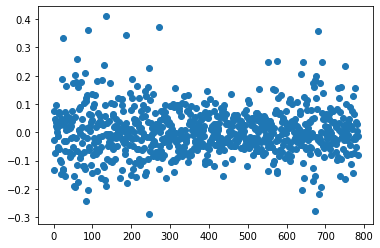

In [17]:
import matplotlib.pyplot as plt

plt.scatter([i for i in range(785)],rate_variation[0])

In [21]:
#평균보다 높게 오른 지점
_sum = 0
for i in range(785):
    _sum += rate_variation[0][i]
_avg1 = _sum/785

In [18]:
#평균보다 높게(a > avg인 a) 오른 뒤 더 큰 (b > a인 b)로 오른 경우
case1_idx = []

for i in range(1,785):
    a = rate_variation[0][i-1]
    b = rate_variation[0][i]
    if (a > _avg2) and (b > a):
        case1_idx.append(i)

In [19]:
#평균보다 높게(a > avg인 a) 오른 뒤 더 적게 (a > b > avg인 b) 오른 경우
case2_idx = []

for i in range(1,785):
    a = rate_variation[0][i-1]
    b = rate_variation[0][i]
    if (a > _avg2) and (a > b > _avg2):
        case2_idx.append(i)

In [20]:
#평균보다 높게(a > avg인 a) 오른 뒤 평균보다 적게 (avg > b인 b) 오른 경우
case3_idx = []

for i in range(1,785):
    a = rate_variation[0][i-1]
    b = rate_variation[0][i]
    if (a > _avg2) and (_avg2 > b):
        case3_idx.append(i)

In [21]:
#평균보다 적게(avg >a인 a) 오른 뒤 더 크게 (avg > b > a인 b) 오른 경우
case4_idx = []

for i in range(1,785):
    a = rate_variation[0][i-1]
    b = rate_variation[0][i]
    if (_avg2 > a) and (_avg2 > b > a):
        case4_idx.append(i)

In [22]:
#평균보다 적게(avg >a인 a) 오른 뒤 더 평균보다 크게 (b > avg인 b) 오른 경우
case5_idx = []

for i in range(1,785):
    a = rate_variation[0][i-1]
    b = rate_variation[0][i]
    if (_avg2 > a) and (b > _avg2):
        case5_idx.append(i)

In [23]:
#평균보다 적게(avg >a인 a) 오른 뒤 더 적게 (a > b인 b) 오른 경우
case6_idx = []

for i in range(1,785):
    a = rate_variation[0][i-1]
    b = rate_variation[0][i]
    if (_avg2 > a) and (a > b):
        case6_idx.append(i)

In [24]:
print(case1_idx)

[6, 7, 9, 34, 36, 39, 46, 47, 66, 85, 95, 96, 101, 115, 133, 153, 167, 173, 181, 187, 199, 208, 237, 244, 262, 268, 276, 350, 357, 366, 372, 384, 405, 412, 424, 444, 470, 477, 482, 487, 510, 537, 538, 541, 544, 550, 569, 598, 607, 614, 634, 649, 708, 712, 735, 761, 768, 775]


In [25]:
print(case2_idx)

[5, 8, 14, 22, 26, 35, 37, 38, 42, 55, 64, 65, 72, 86, 94, 116, 120, 128, 156, 166, 172, 178, 193, 207, 209, 221, 226, 263, 275, 282, 289, 293, 301, 306, 328, 339, 347, 360, 367, 393, 413, 423, 441, 463, 504, 509, 515, 519, 526, 533, 561, 586, 601, 617, 618, 635, 646, 653, 671, 695, 711, 724, 734, 736, 739, 747, 752, 760, 762, 769, 782]


In [26]:
print(case3_idx)

[2, 10, 15, 18, 20, 23, 27, 30, 32, 40, 43, 48, 52, 56, 58, 61, 67, 69, 73, 75, 78, 81, 83, 87, 89, 92, 97, 99, 102, 105, 108, 110, 112, 117, 121, 123, 126, 129, 131, 134, 137, 139, 144, 146, 148, 154, 157, 159, 161, 163, 168, 170, 174, 176, 179, 182, 188, 191, 194, 197, 200, 202, 204, 210, 213, 215, 217, 219, 222, 224, 227, 229, 231, 235, 238, 240, 242, 245, 247, 250, 252, 254, 257, 259, 264, 266, 269, 272, 277, 280, 283, 285, 287, 290, 294, 296, 298, 302, 304, 307, 309, 311, 314, 318, 320, 323, 325, 329, 332, 337, 340, 344, 348, 351, 353, 355, 358, 361, 363, 368, 370, 373, 376, 379, 381, 385, 387, 389, 391, 394, 396, 399, 401, 403, 406, 408, 410, 414, 416, 419, 425, 427, 430, 433, 435, 437, 439, 442, 445, 447, 449, 451, 453, 455, 458, 460, 464, 466, 471, 474, 478, 483, 485, 488, 490, 492, 494, 496, 498, 501, 505, 511, 513, 516, 520, 522, 524, 527, 529, 531, 534, 539, 542, 545, 548, 551, 553, 555, 559, 562, 564, 567, 570, 572, 574, 576, 578, 581, 583, 587, 589, 591, 593, 596, 599, 602

In [27]:
print(case4_idx)

[12, 24, 44, 49, 53, 70, 76, 90, 103, 113, 124, 140, 142, 149, 151, 183, 205, 211, 273, 278, 291, 299, 316, 326, 333, 335, 342, 377, 397, 417, 420, 428, 461, 468, 479, 506, 546, 584, 624, 631, 640, 641, 665, 684, 697, 704, 715, 718, 731, 743, 777, 778]


In [28]:
print(case5_idx)

[1, 4, 13, 17, 19, 21, 25, 29, 31, 33, 41, 45, 51, 54, 57, 60, 63, 68, 71, 74, 77, 80, 82, 84, 88, 91, 93, 98, 100, 104, 107, 109, 111, 114, 119, 122, 125, 127, 130, 132, 136, 138, 143, 145, 147, 152, 155, 158, 160, 162, 165, 169, 171, 175, 177, 180, 186, 190, 192, 196, 198, 201, 203, 206, 212, 214, 216, 218, 220, 223, 225, 228, 230, 234, 236, 239, 241, 243, 246, 249, 251, 253, 256, 258, 261, 265, 267, 271, 274, 279, 281, 284, 286, 288, 292, 295, 297, 300, 303, 305, 308, 310, 313, 317, 319, 322, 324, 327, 331, 336, 338, 343, 346, 349, 352, 354, 356, 359, 362, 365, 369, 371, 375, 378, 380, 383, 386, 388, 390, 392, 395, 398, 400, 402, 404, 407, 409, 411, 415, 418, 422, 426, 429, 432, 434, 436, 438, 440, 443, 446, 448, 450, 452, 454, 457, 459, 462, 465, 469, 473, 476, 481, 484, 486, 489, 491, 493, 495, 497, 500, 503, 508, 512, 514, 518, 521, 523, 525, 528, 530, 532, 536, 540, 543, 547, 549, 552, 554, 558, 560, 563, 566, 568, 571, 573, 575, 577, 580, 582, 585, 588, 590, 592, 595, 597, 600,

In [29]:
print(case6_idx)

[3, 11, 16, 28, 50, 59, 62, 79, 106, 118, 135, 141, 150, 164, 184, 185, 189, 195, 232, 233, 248, 255, 260, 270, 312, 315, 321, 330, 334, 341, 345, 364, 374, 382, 421, 431, 456, 467, 472, 475, 480, 499, 502, 507, 517, 535, 556, 557, 565, 579, 594, 603, 625, 630, 632, 637, 644, 651, 655, 664, 681, 685, 714, 721, 722, 728, 732, 756, 766, 771, 784]


In [30]:
a1 = len(case1_idx)
a2 = len(case2_idx)
a3 = len(case3_idx)
a4 = len(case4_idx)
a5 = len(case5_idx)
a6 = len(case6_idx)

In [31]:
a1,a2,a3,a4,a5,a6

(58, 71, 266, 52, 266, 71)

In [ ]:
(52, 60, 264, 60, 264, 84)

In [32]:
a1+a2+a3+a4+a5+a6

784

In [ ]:
price_data[0]


## 1. 2번째 주차의 상승률부터 고려하고있다.
## 2. case_idx에 담긴 값은 a의 index 값이므로, b = a+1이다.
## 3. 해당 주의 집값 상승률과 전 주의 빈출 키워드를 비교하거나
## 4. case에 따른 a에 해당하는 주의 빈출 키워드를 확인 해본다.

In [29]:
import pandas as pd
import pickle

keyword = pd.read_csv('../article/headline_keyword/weekly_headline_keyword.csv')

In [30]:
del keyword['Unnamed: 0']
del keyword['Unnamed: 0.1']

In [31]:
import re

def sep_keyword(string):
    string = string.split(",")
    word_arr = []
    for word in string:
        word_arr.append(re.sub('[^A-Za-z0-9가-힣]', '', word))

    result = []
    for i in range(0,len(word_arr),2):
        if word_arr[i] != '':
            result.append(word_arr[i])
    return result

In [6]:
for i in range(len(keyword)):
    string = keyword['keyword'][i]
    keyword['keyword'][i] = sep_keyword(string)
    
keyword.to_pickle('../article/headline_keyword/weekly_headline_keyword.pkl')

<ipython-input-6-ae50f35fb153>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword['keyword'][i] = sep_keyword(string)


TypeError: to_pickle() missing 1 required positional argument: 'filepath_or_buffer'

In [7]:
keyword.to_pickle('../article/headline_keyword/weekly_headline_keyword.pkl')

In [34]:
keyword = pd.read_pickle('../article/headline_keyword/weekly_headline_keyword.pkl')

In [37]:
keyword['keyword']

0                                       [취득세, 등록세, 05P씩, 인하]
1                                 [양도세, 부담, 덜자, 하반기, 매물, 늘듯]
2                                [서울, 대치동, 57평형, 보유세, 651만원]
3                         [양도세, 줄이는, 방법, 필요경비, 증빙서류, 꼭, 챙기자]
4                       [올해, 실거래가, 신고제, 폭풍, 이중계약서, 관행, 사라진다]
                                 ...                        
1012957        [부동산, 100자, 정보, 대보건설, 올해, 1조105억원, 수주, 성공, 외]
1012958                       [미분양, 주택도, 패닉바잉, 17년만, 에, 최저치]
1012959                      [집값, 조사때, 표본수, 늘리고, 실거래감정가, 추가]
1012960                     [치솟는, 집값에, 미분양, 아파트, 3년만, 에, 최저]
1012961    [반얀트리그룹, 의, 카시아, 국내, 최초, 적용프리미엄, 레지던스, 카시아, 속초...
Name: keyword, Length: 1012962, dtype: object